# 1. First Steps
* numpy
* scipy
* pandas
* scikit-learn
* matplotlib
* statsmodels
* beautifulsoup4
* networkx
* nltk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import scipy
# import sklearn
# import statsmodels
# import bs4
# import networkx as nx
# import nltk  # natural language toolkit
# import gensim  # text analysis, LSA and LDA

(506, 13)
(506,)
(506, 1)


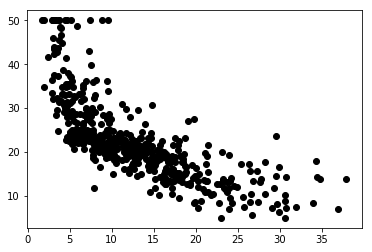

In [2]:
# toy dataset 1
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# load the dataset
boston_dataset = datasets.load_boston()
x_full = boston_dataset.data
y = boston_dataset.target
print(x_full.shape)
print(y.shape)

# feature selection
selector = SelectKBest(f_regression, k=1)
selector.fit(x_full, y)
x = x_full[:, selector.get_support()]
print(x.shape)

plt.scatter(x,y,color='black')

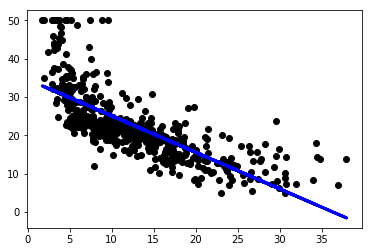

In [3]:
# linear regression
linear_regressor = LinearRegression(normalize = True)
linear_regressor.fit(x,y)
plt.scatter(x,y,color='black')
plt.plot(x, linear_regressor.predict(x), color='blue', linewidth=3)

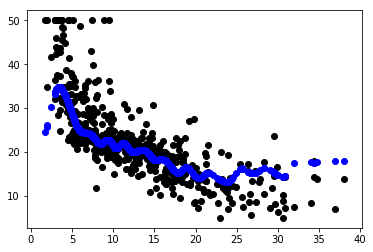

In [4]:
# SVR
SVR_regressor = SVR()
SVR_regressor.fit(x,y)
plt.scatter(x,y,color='black')
plt.scatter(x, SVR_regressor.predict(x), color='blue')

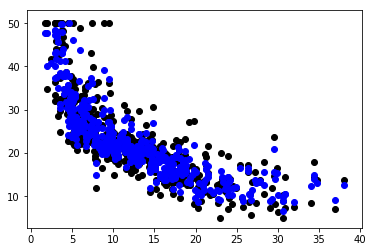

In [5]:
# random forest
RF_regressor = RandomForestRegressor()
RF_regressor.fit(x,y)
plt.scatter(x,y,color='black')
plt.scatter(x, RF_regressor.predict(x), color='blue')

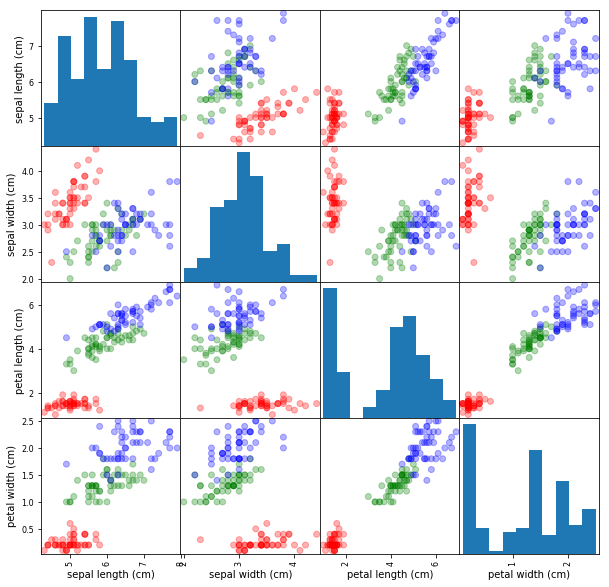

In [6]:
# toy dataset 2
iris = datasets.load_iris()

# convert target into colors
colors = list()
palette = {0:'red', 1:'green', 2:'blue'}
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])
    
df = pd.DataFrame(iris.data, columns = iris.feature_names)
scatterplot = pd.scatter_matrix(df, alpha = 0.3, figsize = (10,10), 
                                diagonal = 'hist', c = colors, marker = 'o', grid = True)

### loading data from other resources
#### MLdata.org
> from sklearn.datasets import fetch_mldata  
earthquakes = fetch_mldata('global-earthquakes')

#### LIBSVM or other web
> import urllib2  
target_page = '...'
a2a = urllib2.urlopen(target_page)
from sklearn import load_svmlight_file
x_train, y_train = load_svmlight_file(a2a)

#### csv or test files
> data = np.loadtxt('filename.csv', delimiter = ',')

OR
> data = pd.read_csv('filename.csv', sep = ',', decimal = '.', header = None, names = [...])

#### scikit-learn sample generators
> from sklearn import datasets
x, y = datasets.make_classification(n_sample = 10_6, n_features = 10, random_state = 101)

# 2. Data Munging
## load the dataset

In [7]:
# load the dataset
from urllib.request import urlopen
iris_p = urlopen("http://aima.cs.berkeley.edu/data/iris.csv")
iris = pd.read_csv(iris_p, sep=',', decimal='.', header=None, 
                         names= ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'target'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
y = iris.target
y.head(2)

0    setosa
1    setosa
Name: target, dtype: object

In [9]:
x = iris[[0,1,2,3]]
x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
# dealing with problematic data
# load the data with parsing the dates
fake_dataset = pd.read_csv('code_final_version/chapter_2/a_loading_example_1.csv', sep=',', parse_dates=[0])
fake_dataset

,Date,Temperature_city_1,Temperature_city_2,Temperature_city_3,Which_destination
0,2014-09-10,80.0,32.0,40,1
1,2014-09-11,100.0,50.0,36,2
2,2014-09-12,102.0,55.0,46,1
3,2014-09-13,60.0,20.0,35,3
4,2014-09-14,60.0,NaN,32,3
5,2014-09-15,NaN,57.0,42,2


In [11]:
# fill NA with the mean of each column
fake_dataset = fake_dataset.fillna(fake_dataset.mean(axis=0)) # or use fake_dataset.fillna(val, inplace = True)
fake_dataset

,Date,Temperature_city_1,Temperature_city_2,Temperature_city_3,Which_destination
0,2014-09-10,80.0,32.0,40,1
1,2014-09-11,100.0,50.0,36,2
2,2014-09-12,102.0,55.0,46,1
3,2014-09-13,60.0,20.0,35,3
4,2014-09-14,60.0,42.8,32,3
5,2014-09-15,80.4,57.0,42,2


In [12]:
# load data with bad rows or columns
bad_dataset = pd.read_csv('code_final_version/chapter_2/a_loading_example_2.csv', error_bad_lines=False)
bad_dataset

b'Skipping line 4: expected 3 fields, saw 4\n'


,Val1,Val2,Val3
0,0,0,0
1,1,1,1
2,3,3,3


In [13]:
# load big dataset chunk by chunk
iris_chunks = pd.read_csv('code_final_version/chapter_2/datasets-uci-iris.csv', header = None, chunksize = 10)
for chunk in iris_chunks:
    print(chunk.shape)
    print(chunk)
    break
# 还有其他几种方法，见pp42-45

(10, 5)
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa


## data preprocessing

In [14]:
# data preprocessing
# create a mask
mask_feature = iris['sepal_length'] > 6
mask_feature.head()

0    False
1    False
2    False
3    False
4    False
Name: sepal_length, dtype: bool

In [15]:
mask_target = iris['target'] == 'virginica'
iris.loc[mask_target, 'target'] = 'new label'
iris['target'].unique()

array(['setosa', 'versicolor', 'new label'], dtype=object)

In [16]:
# group
grouped_target_mean = iris.groupby(['target']).mean()
grouped_target_mean

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
new label,6.588,2.974,5.552,2.026
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326


In [17]:
# sort
iris.sort_values(by='sepal_length').head()

,sepal_length,sepal_width,petal_length,petal_width,target
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


### rolling time-series data
> smooth_time_series = pd.rolling_mean(time_series, 5)

OR
> median_time_series = pd.rolling_median(time_series, 5)

## data selection

In [18]:
dataset = pd.read_csv('code_final_version/chapter_2/a_selection_example_1.csv', index_col = 0)
dataset

,val1,val2,val3
n,,,
100,10,10,C
101,10,20,C
102,10,30,B
103,10,40,B
104,10,50,A


In [19]:
dataset['val3'][104]

'A'

In [20]:
dataset.iloc[4,2]

'A'

In [21]:
dataset[[2,1]][0:2]

,val3,val2
n,,
100,C,10
101,C,20


In [22]:
dataset.iloc[range(2), [2,1]]

,val3,val2
n,,
100,C,10
101,C,20


## categorical and textual data
不知道Python能不能直接处理分类变量，还是必须要手动转成dummy？-- 老公说可以直接处理了。不过这里弄清楚了之后还是好一点：分类变量level太多的话，实际上会影响DOF，然后overfit

In [23]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder()
levels = ['sunny', 'cloudy', 'snowy', 'rainy', 'foggy']
fit_levs = le.fit_transform(levels)
print(fit_levs)
ohe.fit([[fit_levs[0]], [fit_levs[1]], [fit_levs[2]], [fit_levs[3]],[fit_levs[4]]])
print(ohe.transform([le.transform(['sunny'])]).toarray())
print(ohe.transform([le.transform(['cloudy'])]).toarray())

[4 0 3 2 1]
[[ 0.  0.  0.  0.  1.]]
[[ 1.  0.  0.  0.  0.]]


In [24]:
# another example of one hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False) #default=True, Will return sparse matrix if set True else will return an array.
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
['cold']


In [25]:
# text data
# load the toy data
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)
twenty_sci_news.filenames

array([ '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61116',
       '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58122',
       '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58903',
       ...,
       '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60774',
       '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60954',
       '/Users/chensong/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58911'], 
      dtype='<U96')

In [26]:
# vectorize, get a doc-token matrix that has 1187 docs and 25638 tokens
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
word_count = count_vect.fit_transform(twenty_sci_news.data)
word_count.shape

(1187, 25638)

In [27]:
# print word count in the 1st doc
word_list = count_vect.get_feature_names()
for n in word_count[0].indices:
    print("Word:", word_list[n], "appears", word_count[0, n], "times")
    break

Word: fred appears 1 times


In [28]:
# tf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(use_idf=False, norm='l1')  # Default: use_idf=True for tf-idf
word_freq = tf_vect.fit_transform(twenty_sci_news.data)
word_list = tf_vect.get_feature_names()
for n in word_freq[0].indices:
    print("Word:", word_list[n], "has frequency", word_freq[0, n]) 
    break

Word: fred has frequency 0.010989010989


In [29]:
# n-gram
text_1 = 'we love data science'
text_2 = 'data science is hard'
documents = [text_1, text_2]

# That is what we say above, the default one
count_vect_1_grams = CountVectorizer(ngram_range=(1, 1), stop_words=[], min_df=1)
word_count = count_vect_1_grams.fit_transform(documents)
word_list = count_vect_1_grams.get_feature_names()
print("Word list = ", word_list) 
print("text_1 is described with", [word_list[n] + "(" + str(word_count[0, n]) + ")" for n in word_count[0].indices]) 
print("text_2 is described with", [word_list[n] + "(" + str(word_count[1, n]) + ")" for n in word_count[1].indices]) 

Word list =  ['data', 'hard', 'is', 'love', 'science', 'we']
text_1 is described with ['science(1)', 'data(1)', 'love(1)', 'we(1)']
text_2 is described with ['hard(1)', 'is(1)', 'science(1)', 'data(1)']


In [30]:
# Now a bi-gram count vectorizer
count_vect_2_grams = CountVectorizer(ngram_range=(2, 2))
word_count = count_vect_2_grams.fit_transform(documents)
word_list = count_vect_2_grams.get_feature_names()
print("Word list = ", word_list) 
print("text_1 is described with", [word_list[n] + "(" + str(word_count[0, n]) + ")" for n in word_count[0].indices]) 

Word list =  ['data science', 'is hard', 'love data', 'science is', 'we love']
text_1 is described with ['data science(1)', 'love data(1)', 'we love(1)']


In [31]:
# Now a uni- and bi-gram count vectorizer
count_vect_grams = CountVectorizer(ngram_range=(1, 2))
word_count = count_vect_grams.fit_transform(documents)
word_list = count_vect_grams.get_feature_names()
print("Word list = ", word_list) 
print("text_1 is described with", [word_list[n] + "(" + str(word_count[0, n]) + ")" for n in word_count[0].indices]) 

Word list =  ['data', 'data science', 'hard', 'is', 'is hard', 'love', 'love data', 'science', 'science is', 'we', 'we love']
text_1 is described with ['data science(1)', 'love data(1)', 'we love(1)', 'science(1)', 'data(1)', 'love(1)', 'we(1)']


In [32]:
# hashing vectorize: 每一个feature是hash相同，但是意义彼此无关的一些词，这样可以避免有太多的feature
from sklearn.feature_extraction.text import HashingVectorizer
hash_vect = HashingVectorizer(n_features=1000)
word_hashed = hash_vect.fit_transform(twenty_sci_news.data)
word_hashed.shape

(1187, 1000)

## data processing with numpy

In [33]:
# Transform a list into a uni-dimensional array
list_of_ints = [1,2,3]
Array_1 = np.array(list_of_ints)
Array_1
print(type(Array_1))
print(Array_1.dtype)

<class 'numpy.ndarray'>
int64


In [34]:
# Controlling the memory size
print(Array_1.nbytes)
Array_1 = np.array(list_of_ints, dtype= 'int8')
print(Array_1.nbytes)
Array_1b = Array_1.astype('float32')
print(Array_1b.nbytes)

24
3
12


In [35]:
# Heterogeneous lists
complex_list = [1,2,3] + [1.,2.,3.] + ['a','b','c']
Array_2 = np.array(complex_list[:3]) # at first the input list is just ints
print('complex_list[:3]', Array_2.dtype) 
Array_2 = np.array(complex_list[:6]) # then it is ints and floats
print('complex_list[:6]', Array_2.dtype) 
Array_2 = np.array(complex_list) # finally we add strings
print('complex_list[:] ',Array_2.dtype)
print(isinstance(Array_2[0],np.number))

complex_list[:3] int64
complex_list[:6] float64
complex_list[:]  <U32
False


In [36]:
# From lists to multidimensional arrays
# Transform a list into a bidimensional array
a_list_of_lists = [[1,2,3],[4,5,6],[7,8,9]]
Array_2D = np.array(a_list_of_lists )
Array_2D

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
# Transform a list into a multi-dimensional array
a_list_of_lists_of_lists = [[[1,2],[3,4],[5,6]],
[[7,8],[9,10],[11,12]]]
Array_3D = np.array(a_list_of_lists_of_lists)
Array_3D

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [38]:
# Resizing arrays
# Restructuring a NumPy array shape
original_array = np.array([1, 2, 3, 4, 5, 6, 7, 8])
Array_a = original_array.reshape(4,2)
Array_b = original_array.reshape(4,2).copy() # 在改动之前copy，所以保持了原来的样子
Array_c = original_array.reshape(2,2,2)
# Attention because reshape creates just views, not copies
original_array[0] = -1
Array_a # 动态镜像original_array

array([[-1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8]])

In [39]:
Array_b

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [40]:
Array_c

array([[[-1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]]])

In [41]:
# Arrays derived from NumPy functions
ordinal_values = np.arange(9).reshape(3,3)
ordinal_values

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
np.arange(9)[::-1]

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [43]:
np.random.randint(low=1,high=10,size=(3,3)).reshape(3,3)

array([[1, 5, 9],
       [7, 1, 7],
       [2, 5, 3]])

In [44]:
np.zeros((3,3)) # np.ones((3,3)), np.eye(3)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [45]:
fractions = np.linspace(0,1,10)
fractions

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [46]:
growth = np.logspace(0,1,10,10)
growth

array([  1.        ,   1.29154967,   1.66810054,   2.15443469,
         2.7825594 ,   3.59381366,   4.64158883,   5.9948425 ,
         7.74263683,  10.        ])

In [47]:
std_gaussian = np.random.normal(size=(3,3))
std_gaussian

array([[ 0.52643076,  0.75703012,  0.25744451],
       [-0.4579536 ,  0.68482033, -0.3039938 ],
       [ 0.30444151, -0.43596106, -1.44903923]])

In [48]:
gaussian = np.random.normal(1,3, size=(3,3))
gaussian

array([[ 2.52136389,  0.83506735,  2.41234691],
       [ 2.61449212,  1.97287645,  3.56050524],
       [-0.71846805,  4.03033228, -3.44785936]])

In [49]:
np.random.uniform(1,10, size=(3,3))

array([[ 2.83132904,  2.74934627,  9.64982934],
       [ 8.1178717 ,  9.82838703,  9.09455961],
       [ 9.15069113,  2.61401172,  4.04544104]])

In [50]:
# NumPy fast operation and computations
a = np.arange(5).reshape(1,5)
a += 1
a*a

array([[ 1,  4,  9, 16, 25]])

In [51]:
a = np.arange(5).reshape(1,5) + 1
b = np.arange(5).reshape(5,1) + 1
a * b

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [52]:
a2 = np.array([1,2,3,4,5] * 5).reshape(5,5)
b2 = a2.T
a2 * b2

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [53]:
a2

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [54]:
np.sum(a2, axis=0)

array([ 5, 10, 15, 20, 25])

In [55]:
np.sum(a2, axis=1)

array([15, 15, 15, 15, 15])

**注意：numpy的计算比python原始以及math包都更快，包括四则运算和平方开方等**

In [56]:
# Matrix operations
M = np.arange(5*5, dtype=float).reshape(5,5)
M

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.]])

In [57]:
coefs = np.array([1., 0.5, 0.5, 0.5, 0.5])
coefs_matrix = np.column_stack((coefs,coefs[::-1]))
coefs_matrix

array([[ 1. ,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  1. ]])

In [58]:
np.dot(M,coefs)

array([  5.,  20.,  35.,  50.,  65.])

In [59]:
np.dot(coefs,M)

array([ 25.,  28.,  31.,  34.,  37.])

In [60]:
np.dot(M,coefs_matrix)

array([[  5.,   7.],
       [ 20.,  22.],
       [ 35.,  37.],
       [ 50.,  52.],
       [ 65.,  67.]])

In [61]:
# Slicing and indexing with NumPy arrays
M = np.arange(10*10, dtype=int).reshape(10,10)
M[2:9:2,5:] # 第2-9行，step=2；第五列到最后

array([[25, 26, 27, 28, 29],
       [45, 46, 47, 48, 49],
       [65, 66, 67, 68, 69],
       [85, 86, 87, 88, 89]])

In [62]:
row_index = (M[:,0]>=20) & (M[:,0]<=80)
col_index = M[0,:]>=5
M[row_index,:][:,col_index]

array([[25, 26, 27, 28, 29],
       [35, 36, 37, 38, 39],
       [45, 46, 47, 48, 49],
       [55, 56, 57, 58, 59],
       [65, 66, 67, 68, 69],
       [75, 76, 77, 78, 79],
       [85, 86, 87, 88, 89]])

In [63]:
mask = (M>=20) & (M<=90) & ((M / 10.) % 1 >= 0.5)
M[mask]

array([25, 26, 27, 28, 29, 35, 36, 37, 38, 39, 45, 46, 47, 48, 49, 55, 56,
       57, 58, 59, 65, 66, 67, 68, 69, 75, 76, 77, 78, 79, 85, 86, 87, 88,
       89])

In [64]:
row_index = [1,1,2,7]
col_index = [0,2,4,8]
M[row_index,:][:,col_index]

array([[10, 12, 14, 18],
       [10, 12, 14, 18],
       [20, 22, 24, 28],
       [70, 72, 74, 78]])

In [65]:
# Stacking NumPy arrays
dataset = np.arange(10*5).reshape(10,5)
single_line = np.arange(1*5).reshape(1,5)
a_few_lines = np.arange(3*5).reshape(3,5)
np.vstack((dataset,single_line)) #添加行
# np.vstack((dataset,a_few_lines))
# np.vstack((dataset,single_line,single_line))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [ 0,  1,  2,  3,  4]])

In [66]:
bias = np.ones(10).reshape(10,1)
np.hstack((dataset,bias)) #添加列，或np.column_stack((dataset,bias))

array([[  0.,   1.,   2.,   3.,   4.,   1.],
       [  5.,   6.,   7.,   8.,   9.,   1.],
       [ 10.,  11.,  12.,  13.,  14.,   1.],
       [ 15.,  16.,  17.,  18.,  19.,   1.],
       [ 20.,  21.,  22.,  23.,  24.,   1.],
       [ 25.,  26.,  27.,  28.,  29.,   1.],
       [ 30.,  31.,  32.,  33.,  34.,   1.],
       [ 35.,  36.,  37.,  38.,  39.,   1.],
       [ 40.,  41.,  42.,  43.,  44.,   1.],
       [ 45.,  46.,  47.,  48.,  49.,   1.]])

In [67]:
np.dstack((dataset*1,dataset*2,dataset*3)) #3D添加

array([[[  0,   0,   0],
        [  1,   2,   3],
        [  2,   4,   6],
        [  3,   6,   9],
        [  4,   8,  12]],

       [[  5,  10,  15],
        [  6,  12,  18],
        [  7,  14,  21],
        [  8,  16,  24],
        [  9,  18,  27]],

       [[ 10,  20,  30],
        [ 11,  22,  33],
        [ 12,  24,  36],
        [ 13,  26,  39],
        [ 14,  28,  42]],

       [[ 15,  30,  45],
        [ 16,  32,  48],
        [ 17,  34,  51],
        [ 18,  36,  54],
        [ 19,  38,  57]],

       [[ 20,  40,  60],
        [ 21,  42,  63],
        [ 22,  44,  66],
        [ 23,  46,  69],
        [ 24,  48,  72]],

       [[ 25,  50,  75],
        [ 26,  52,  78],
        [ 27,  54,  81],
        [ 28,  56,  84],
        [ 29,  58,  87]],

       [[ 30,  60,  90],
        [ 31,  62,  93],
        [ 32,  64,  96],
        [ 33,  66,  99],
        [ 34,  68, 102]],

       [[ 35,  70, 105],
        [ 36,  72, 108],
        [ 37,  74, 111],
        [ 38,  76, 114],
        [ 3

In [68]:
bias = np.ones(10)
np.insert(dataset, 3, bias, axis=1)

array([[ 0,  1,  2,  1,  3,  4],
       [ 5,  6,  7,  1,  8,  9],
       [10, 11, 12,  1, 13, 14],
       [15, 16, 17,  1, 18, 19],
       [20, 21, 22,  1, 23, 24],
       [25, 26, 27,  1, 28, 29],
       [30, 31, 32,  1, 33, 34],
       [35, 36, 37,  1, 38, 39],
       [40, 41, 42,  1, 43, 44],
       [45, 46, 47,  1, 48, 49]])

In [69]:
np.insert(dataset, 3, dataset.T, axis=1)

array([[ 0,  1,  2,  0,  1,  2,  3,  4,  3,  4],
       [ 5,  6,  7,  5,  6,  7,  8,  9,  8,  9],
       [10, 11, 12, 10, 11, 12, 13, 14, 13, 14],
       [15, 16, 17, 15, 16, 17, 18, 19, 18, 19],
       [20, 21, 22, 20, 21, 22, 23, 24, 23, 24],
       [25, 26, 27, 25, 26, 27, 28, 29, 28, 29],
       [30, 31, 32, 30, 31, 32, 33, 34, 33, 34],
       [35, 36, 37, 35, 36, 37, 38, 39, 38, 39],
       [40, 41, 42, 40, 41, 42, 43, 44, 43, 44],
       [45, 46, 47, 45, 46, 47, 48, 49, 48, 49]])

In [70]:
np.insert(dataset, 3, np.ones(5), axis=0)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 1,  1,  1,  1,  1],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

# 3. The Data Science Pipeline
## step 1: EDA (Exploratory data analysis)

In [71]:
iris_filename = 'code_final_version/chapter_3/datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, header=None, 
                   names= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


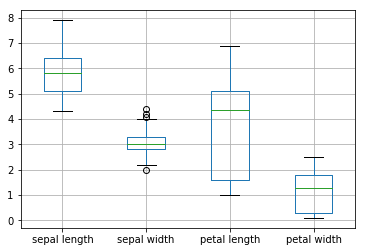

In [73]:
iris.boxplot()

In [74]:
iris.quantile([0.1, 0.9])

,sepal length,sepal width,petal length,petal width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


In [75]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
pd.crosstab(iris['petal length'] > iris['petal length'].mean(), iris['petal width'] > iris['petal width'].mean())

petal width,False,True
petal length,,
False,56,1
True,4,89


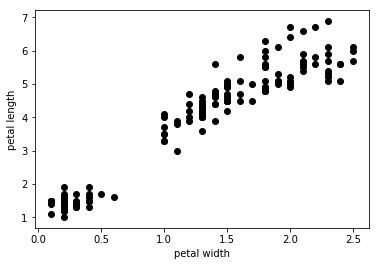

In [77]:
plt.scatter(iris['petal width'], iris['petal length'], alpha=1.0, color='k')
plt.xlabel("petal width")
plt.ylabel("petal length")

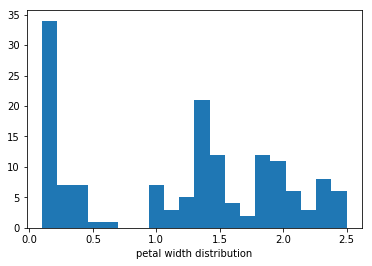

In [78]:
plt.hist(iris['petal width'], bins=20)
plt.xlabel("petal width distribution")

## step 2: feature transformation and creation

In [79]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
cali = datasets.california_housing.fetch_california_housing()
X = cali['data']
Y = cali['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 12345)

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor()
knnregressor.fit(X_train, Y_train)
Y_pred = knnregressor.predict(X_test)
print("MSE =", mean_squared_error(Y_test, Y_pred))

MSE = 1.11816909066


In [81]:
# after scaling the dataset, MSE got lower
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knnregressor = KNeighborsRegressor()
knnregressor.fit(X_train_scaled, Y_train)
Y_pred = knnregressor.predict(X_test_scaled)
print("MSE =", mean_squared_error(Y_test, Y_pred))

MSE = 0.405414585031


In [82]:
# create a new feature, 是average occupition这一列的平方根, 进一步降低了MSE
non_linear_feat = 5 # average occupition
X_train_new_feat = np.sqrt(X_train[:,non_linear_feat])
X_train_new_feat.shape = (X_train_new_feat.shape[0], 1)
X_train_extended = np.hstack([X_train, X_train_new_feat])
X_test_new_feat = np.sqrt(X_test[:,non_linear_feat])
X_test_new_feat.shape = (X_test_new_feat.shape[0], 1)
X_test_extended = np.hstack([X_test, X_test_new_feat])

scaler = StandardScaler()
X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extended_scaled = scaler.transform(X_test_extended)

regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, Y_train)
Y_est = regressor.predict(X_test_extended_scaled)
print("MSE =", mean_squared_error(Y_test, Y_est))

MSE = 0.347846413241


## step 3: dimensionality reduction
basic assumption: additive white Gaussian Noise (AWGN)
* use covariance matrix to understand the features related or independent
* PCA
* RandomizedPCA -- 数据量大时的一种近似算法，不能保证全局最优，只能保证局部最优
* LFA -- latent factor analysis: generalization of PCA"，取消了feature之间的垂直约束; 假设arbitrary waveform generator(AWG); explained covariance among the features
* LDA -- linear discriminant analysis: 实际上是supervised的classification算法，但也可以用于dimensionality reduction; 需要用到class label，体现不同类别之间的区别; cannot be used in regression problems
* LSA -- Latent Semantical Analysis: usually used in text mining, after countVerctorize or tfidfVectorize; apply SVD and producing semantic sets of words usually associated with tha same concept
* ICA -- independent component analysis: focus on the statistical independence of the subcomponents and their non-Gaussian distribution; e.g. separation of two sources of voice recorded by two phones; sklearn.decomposition.FastICA
* kernal PCA: some kernals: linear, poly, RBF, sigmoid, cosine
* RBM -- restricted boltzmann machine: add hidden units to produce nonlinear transformation; 属于neural_network的范围

In [83]:
# use covariance matrix to understand the features related or independent
from sklearn import datasets
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print(iris.feature_names)
cov_data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

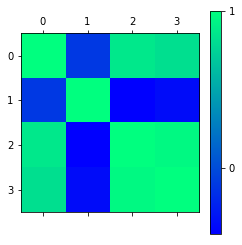

In [84]:
img = plt.matshow(cov_data, cmap=plt.cm.winter)
plt.colorbar(img, ticks=[-1, 0, 1])

In [85]:
# PCA
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150, 2)

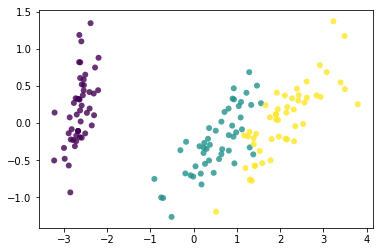

0.97763177502480336

In [86]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [87]:
pca_2c.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

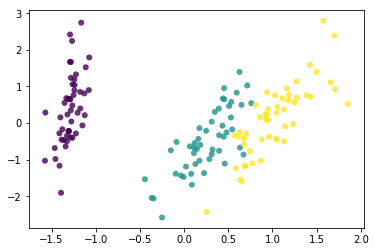

0.97763177502480336

In [88]:
# When True (False by default) the components_ vectors are multiplied by the square root of n_samples 
# and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
# Whitening will remove some information from the transformed signal (the relative variance scales of the components) 
# but can sometime improve the predictive accuracy of the downstream estimators by making their data 
# respect some hard-wired assumptions.
# 所以其实是不是如果先scale再pca，就相当于pca里用了whiten？
# 再查过资料后发现whiten主要是让各个feature方差相同
pca_2cw = PCA(n_components=2, whiten=True)
X_pca_1cw = pca_2cw.fit_transform(iris.data)
plt.scatter(X_pca_1cw[:,0], X_pca_1cw[:,1], c=iris.target, alpha=0.8, edgecolors='none'); plt.show()
pca_2cw.explained_variance_ratio_.sum()

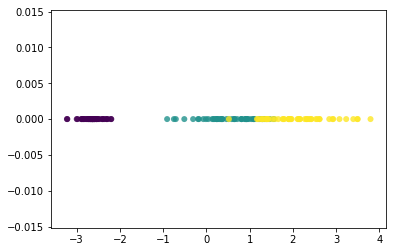

0.92461620717426829

In [89]:
pca_1c = PCA(n_components=1)
X_pca_1c = pca_1c.fit_transform(iris.data)
plt.scatter(X_pca_1c[:,0], np.zeros(X_pca_1c.shape), c=iris.target, alpha=0.8, edgecolors='none'); plt.show()
pca_1c.explained_variance_ratio_.sum()

In [90]:
# at least 95% variance
pca_95pc = PCA(n_components=0.95)
X_pca_95pc = pca_95pc.fit_transform(iris.data)
print(pca_95pc.explained_variance_ratio_.sum())
print(X_pca_95pc.shape)

0.977631775025
(150, 2)


0.97763177502480381

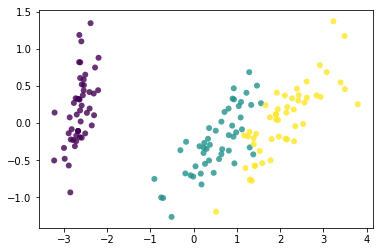

In [91]:
# RandomizedPCA -- 数据量大时的一种近似算法，不能保证全局最优，只能保证局部最优
rpca_2c = PCA(n_components=2, svd_solver='randomized')
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')
rpca_2c.explained_variance_ratio_.sum()

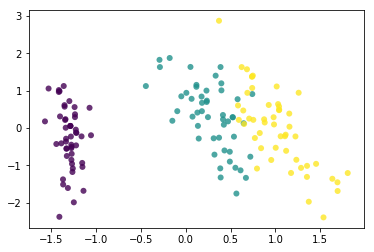

In [92]:
# LFA -- latent factor analysis
# "generalization of PCA"，取消了feature之间的垂直约束
# 假设arbitrary waveform generator(AWG)
# explained covariance among the features
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target, alpha=0.8, edgecolors='none')

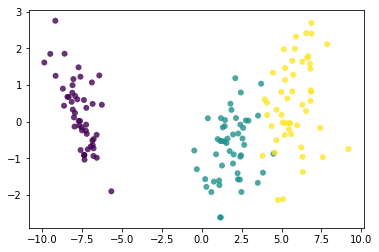

In [93]:
# LDA -- linear discriminant analysis
# 实际上是supervised的classification算法，但也可以用于dimensionality reduction
# 需要用到class label，体现不同类别之间的区别
# cannot be used in regression problems
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_2c = LinearDiscriminantAnalysis(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')

In [94]:
# LSA -- Latent Semantical Analysis
# usually used in text mining, after countVerctorize or tfidfVectorize
# apply SVD and producing semantic sets of words usually associated with tha same concept
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)

from sklearn.decomposition import TruncatedSVD
tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
# show a part of the content of a letent vector
np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort()[-10:][::-1]] 

array(['jupiter', 'sq', 'comet', 'of', 'gehrels', 'zisfein', 'jim', 'gene',
       'omen', 'msb'], 
      dtype='<U79')

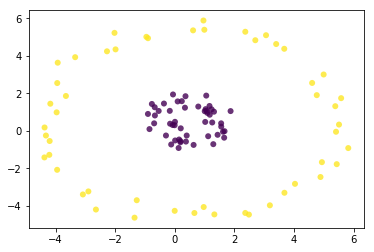

In [96]:
# kernal PCA
# some kernals: linear, poly, RBF, sigmoid, cosine
def circular_points (radius, N):
    return np.array([[np.cos(2*np.pi*t/N)*radius, np.sin(2*np.pi*t/N)*radius] for t in range(N)])
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points), circular_points(5.0, N_points)])
fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0]*N_points + [1]*N_points)
plt.scatter(fake_circular_data[:,0], fake_circular_data[:,1], c=fake_circular_target, alpha=0.8, edgecolors='none')

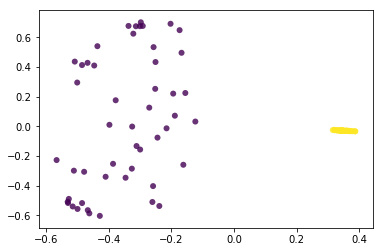

In [97]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target, alpha=0.8, edgecolors='none')

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


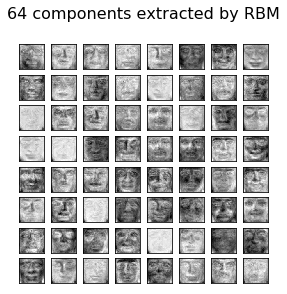

In [98]:
# RBM -- restricted boltzmann machine
# add hidden units to produce nonlinear transformation
# 属于neural_network的范围
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM # 注意：只是基本功能，可能无法满足处理大数据的要求
n_components = 64 # Try with 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()
X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data), 0.5)
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01, n_iter=100)
rbm.fit(X)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)), int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(()); plt.yticks(())
    
plt.suptitle(str(n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

## step 4: detection and treatment of outliers
a point might be an outlier because:
* represent a rare occurrence -- remove or underweighted, or increase sample number
* usual occurrence of another distribution, could be an error in sample generalization -- remove
* mistake -- remove or replace with a mean or mode  

### univariate
* using z-score: higher than 3
* using data description: below 25th precentile - 1.5 IQR or above 75th precentile + 1.5 IQR
(IQR: interquartile range, 75th precentile - 25th precentile)

In [99]:
from sklearn.datasets import load_boston
boston = load_boston()
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3] # remove 3rd column which is binary

import numpy as np
from sklearn import preprocessing
# StandardScaler: zero mean and unit variance -- which is a Z-distribution
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# find values above 3
outliers_rows, outliers_columns = np.where(np.abs(normalized_data)>3)

print(outliers_rows)
print(list(zip(outliers_rows, outliers_columns)))

[ 55  56  57 102 141 199 200 201 202 203 204 225 256 257 262 283 284 347
 351 352 353 353 354 355 364 365 367 373 374 374 380 398 404 405 406 410
 410 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429
 431 436 437 438 445 450 454 455 456 457 466]
[(55, 1), (56, 1), (57, 1), (102, 10), (141, 11), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (225, 4), (256, 1), (257, 4), (262, 4), (283, 1), (284, 1), (347, 1), (351, 6), (352, 6), (353, 1), (353, 6), (354, 6), (355, 6), (364, 4), (365, 4), (367, 4), (373, 11), (374, 4), (374, 11), (380, 0), (398, 0), (404, 0), (405, 0), (406, 4), (410, 0), (410, 10), (411, 10), (412, 10), (412, 11), (414, 0), (414, 11), (415, 10), (416, 10), (418, 0), (418, 10), (419, 10), (423, 10), (424, 10), (425, 10), (426, 10), (427, 0), (427, 10), (429, 10), (431, 10), (436, 10), (437, 10), (438, 10), (445, 10), (450, 10), (454, 10), (455, 10), (456, 10), (457, 10), (466, 10)]


### multivariate
对于有多个feature的dataset，某一行的某一个feature是outlier，不一定整行是ourlier，上面的方法只是找出可能是outlier的行
* 做PCA等dimension reduction，然后看components
* EllipticEnvelope: 检查整个dataset的general distribution，基于distance of each observation; 如果数据本身有2个或以上cluster，会把最remote的cluster视为outlier，而不能detect真正的outlier
* oneClassSVM: 假设原本的数据都是好的，看一个新的数据点是不是outlier，例如spam email detection  
-- kernel and degree: rdf, 3  
-- gamma: as low as possible  
-- nu: nu_est = 0.95 * outlier_fraction + 0.05. 实际上应该就是soft margin

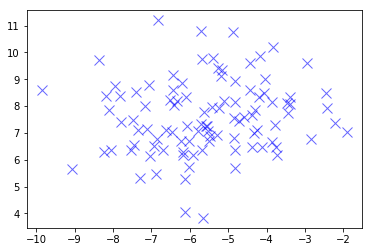

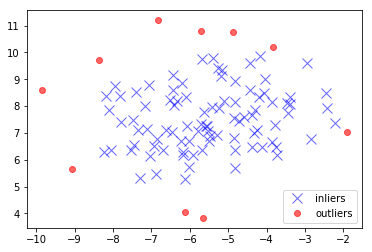

In [100]:
# EllipticEnvelope
# Create an artificial distribution made of blobs
from sklearn.datasets import make_blobs
blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs, cluster_std=1.5, shuffle=True, random_state=5)
# Robust Covariance Estimate
from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0]) 
# contamination: proportion of outliers in the dataset, up to 0.5, suggest to start from 0.01-0.02 which is sbout 3 std
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)
inliers = np.where(detection==1)
# Draw the distribution and the detected outliers
# Just the distribution
plt.plot(blob[0][:,0],blob[0][:,1], 'x', markersize=10, color='blue', alpha=0.6)
plt.show()
# The distribution and the outliers
a = plt.plot(blob[0][inliers,0],blob[0][inliers,1], 'x', markersize=10, color='blue', alpha=0.6, label='inliers')
b = plt.plot(blob[0][outliers,0],blob[0][outliers,1], 'o', markersize=6,color='red', alpha=0.6, label='outliers')
plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='lower right')
plt.show()

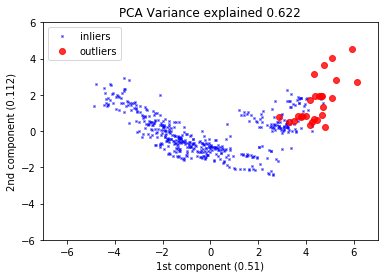

In [101]:
# EllipticEnvelope example 2
# 这是一个EllipticEnvelope不成功的例子：看起来只是找出了另一个cluster
from sklearn.decomposition import PCA
# Normalized data relative to continuos variables
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Just for visualization purposes pick the first 2 PCA components
pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

# Robust Covariance Estimate
robust_covariance_est = EllipticEnvelope(store_precision=False, assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_data)
detection = robust_covariance_est.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

# Draw the distribution and the detected outliers
a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,1], 'x', markersize=2, color='blue', 
             alpha=0.8, label='inliers')
b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,1], 'o', markersize=6,color='red', 
             alpha=0.8, label='outliers')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
plt.title(vtot)
plt.show()

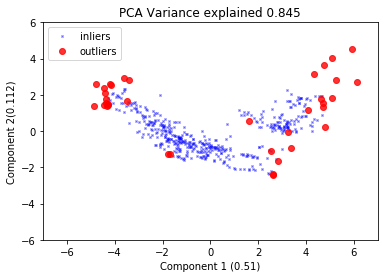

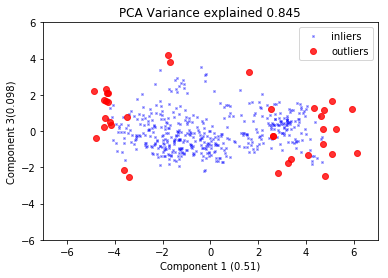

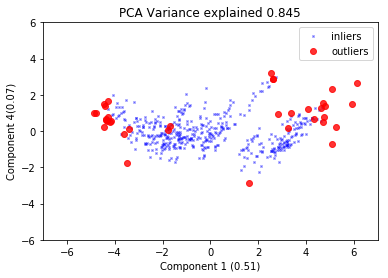

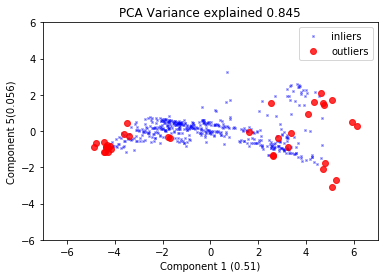

In [102]:
# oneClassSVM
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm
# Normalized data relative to continuos variables
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Just for visualization purposes pick the first 5 PCA components
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
# OneClassSVM fitting and estimates
outliers_fraction = 0.02 # 
nu_estimate = 0.95 * outliers_fraction + 0.05
machine_learning = svm.OneClassSVM(kernel="rbf", gamma=1.0/len(normalized_data), degree=3, nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

# Draw the distribution and the detected outliers from 5 components (1,2), (1,3), (1,4), (1,5)
for r in range(1,5):
  a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,r], 'x', markersize=2, color='blue', 
               alpha=0.6, label='inliers')
  b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,r], 'o', markersize=6,color='red', 
               alpha=0.8, label='outliers')
  plt.xlabel('Component 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
  plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
  plt.xlim([-7,7])
  plt.ylim([-6,6])
  plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
  plt.title(vtot)
  plt.show()

## step 5: scoring functions
### multilabel classification
* confusion matrix
* accuracy
* precision
* recall
* F1 score

In [103]:
from sklearn import datasets
iris = datasets.load_iris()
# No crossvalidation for this dummy notebook
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.50, random_state=4)
# Use a very bad multiclass classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test)
print(iris.target_names)

from sklearn import metrics # TO BE CORRECTED
cm = metrics.confusion_matrix(Y_test, Y_pred) # TO BE CORRECTED
print(cm)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred, average='micro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred, average=None))
print("F1 score:", metrics.f1_score(Y_test, Y_pred, average=None))

['setosa' 'versicolor' 'virginica']
[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]
Accuracy: 0.933333333333
Precision: 0.933333333333
Recall: [ 1.          0.86363636  0.91304348]
F1 score: [ 1.          0.88372093  0.89361702]


In [104]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        30
 versicolor       0.90      0.86      0.88        22
  virginica       0.88      0.91      0.89        23

avg / total       0.93      0.93      0.93        75



### binary classification
* ROC (receiver operating characteristics curve)
* AUC (area under a curve): ramdom guess of a balance dataset: 0.5; best: 1    
sklearn.metrics.roc_auc_score()

### regression
* MAE -- mean absolute error
* MSE -- mean squared error
* R2: 0-1, the higher the better. sklearn.metrics.r2_score()

In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error([1.0, 0.0, 0.0], [0.0, 0.0, -1.0])

0.66666666666666663

In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error([-10.0, 0.0, 0.0], [0.0, 0.0, 0.0])

33.333333333333336

## step 6: testing and validating
* train_test_split
* cross_val_score
* KFold
* stratifiedKFold
* leaveOneOut
* leavePOut
* leaveOneGroupOut
* leavePGroupOut

In [107]:
# a simple example with in-sample accuracy
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn import svm
h1 = svm.LinearSVC(C=1.0) # linear SVC
h2 = svm.SVC(kernel='rbf', degree=3, gamma=0.001, C=1.0) # Radial basis SVC
h3 = svm.SVC(kernel='poly', degree=3, C=1.0) # 3rd degree polynomial SVC

h1.fit(X,y)
print(h1.score(X,y)) # in-sample accuracy

0.991652754591


In [108]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
h1.fit(X_train,y_train)
print(h1.score(X_test,y_test)) # Returns the mean accuracy on the given test data and labels

(1257, 64) (540, 64) (1257,) (540,)
0.953703703704


In [109]:
for hypothesis in [h1, h2, h3]:
    hypothesis.fit(X_train,y_train)
    print(hypothesis, hypothesis.score(X_test,y_test))  

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 0.951851851852
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.990740740741
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.985185185185


In [110]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_folds = 10 # Try 3, 5 or 20
eval_scoring='accuracy' # Try also f1
# see http://scikit-learn.org/stable/modules/model_evaluation.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
for hypothesis in [h1, h2, h3]:
    scores = cross_val_score(hypothesis, X_train, y_train, cv=cv_folds, scoring=eval_scoring)
    print(hypothesis, np.mean(scores), np.std(scores))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 0.941846411962 0.018818885661
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.989724014295 0.00711937980026
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.986570346539 0.0104435865068


In [111]:
scores

array([ 0.96899225,  0.96899225,  0.9921875 ,  0.98412698,  0.99206349,
        1.        ,  1.        ,  0.984     ,  0.99186992,  0.98347107])

In [117]:
# cross validation iterator
from sklearn.model_selection import KFold
kfolding = KFold(n_splits=10, shuffle=True, random_state=1)
for train_idx, test_idx in kfolding.split(X):
#    print(train_idx, test_idx)
    h1.fit(X[train_idx],y[train_idx])
    print(h1.score(X[test_idx],y[test_idx]))

0.977777777778
0.961111111111
0.955555555556
0.927777777778
0.955555555556
0.977777777778
0.95
0.966480446927
0.960893854749
0.916201117318


### sampling and bootstrapping

In [118]:
# subsampling
from sklearn.model_selection import ShuffleSplit
subsampling = ShuffleSplit(n_splits=10, test_size=0.1, random_state=1)
for train_idx, test_idx in subsampling.split(X):
    print(train_idx, test_idx)
    break

[1533 1473 1102 ..., 1096  235 1061] [1227 1576  202 1184  428  941  598  267  102 1456 1759  181 1728  264  486
 1629  655  669  820  400  857 1747  248 1510  335  361  834   47  659 1108
 1489 1488 1685 1548  631  898  654  227  846  902  108  161   48 1082 1028
 1036  977 1013  510 1513 1735 1624 1408  772 1221 1432 1464 1203  120 1407
 1273  726 1604  396  531  823 1383 1116  799 1198  434  737 1422  111 1712
 1301 1402  774  888 1310   75  330 1090 1559  623  671  302 1403 1575  258
  241  827 1466  764 1642 1340 1709  447 1171  528 1130  309 1338  389  575
 1745  730  589   37  697 1390 1179 1165  186 1071  815  563 1014 1697  194
 1619 1333 1691 1439 1304 1601  922 1369  223  336 1218  281 1115  190  943
   60 1243  991  158  432 1770  297 1265 1453  661  126  810  305  713   98
  995 1094 1292  711  372  632  268 1639 1359 1748  282  636  622 1764 1308
  292   82  824 1693 1070  546  675  607 1197  177 1780  231 1626  771 1413]


In [119]:
# bootstrap was removed from sklearn, something can use instead
import random
def Bootstrap(n, n_iter=3, random_state=None):
    """
    Random sampling with replacement cross-validation generator.
    For each iter a sample bootstrap of the indexes [0, n) is 
    generated and the function returns the obtained sample 
    and a list of all theexcluded indexes.
    """
    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs

boot = Bootstrap(n=len(X), n_iter=10, random_state=1)
#for train_idx, validation_idx in boot:
#    print(train_idx, validation_idx)
#    break

### Hyper-parameters Optimization
超参数是在开始学习过程之前设置值的参数。 相反，其他参数的值通过训练得出。  
通常是手工设定，不断试错调整，或者对一系列穷举出来的参数组合一通枚举（叫做网格搜索）

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

from sklearn import svm
h = svm.SVC()
hp = svm.SVC(probability=True, random_state=1)

from sklearn.model_selection import GridSearchCV
search_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
scorer = 'accuracy'

search_func = GridSearchCV(estimator=h, param_grid=search_grid, scoring=scorer, 
                                       n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_)

1 loop, best of 3: 8.29 s per loop
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981081122784


#### building custom scoring functions

In [121]:
# use log-loss in grid search
from sklearn.metrics import log_loss, make_scorer
Log_Loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True) 

search_func = GridSearchCV(estimator=hp, param_grid=search_grid, scoring=Log_Loss, n_jobs=-1, iid=False, refit=True, cv=3)
search_func.fit(X,y)
print (search_func.best_score_)
print (search_func.best_params_)

-0.160697892227
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [122]:
# use a customed log-loss to minimize the mistake between 4 and 9
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def my_custom_log_loss_func(ground_truth, p_predictions, penalty = list(), eps=1e-15):
    adj_p = np.clip(p_predictions, eps, 1 - eps)
    lb = LabelBinarizer()
    g = lb.fit_transform(ground_truth)
    if g.shape[1] == 1:
        g = np.append(1 - g, g, axis=1)
    if penalty:
        g[:,penalty] = g[:,penalty] * 2
    summation = np.sum(g * np.log(adj_p))
    return summation * (-1.0/len(ground_truth))

my_custom_scorer = make_scorer(my_custom_log_loss_func, greater_is_better=False, needs_proba=True, penalty = [4,9])

search_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
               {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
search_func = GridSearchCV(estimator=hp, param_grid=search_grid, scoring=my_custom_scorer, n_jobs=1, iid=False, refit=True, cv=3)

search_func.fit(X,y)
print (search_func.best_score_)
print (search_func.best_params_)

-0.199494590776
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


#### reduce grid search runtime using RandomizedSearchCV

In [123]:
from sklearn.model_selection import RandomizedSearchCV
search_dict = {'kernel': ['linear','rbf'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
# can use C:scipy.statsexpon(scale=100) to get a better result
scorer = 'accuracy'
search_func = RandomizedSearchCV(estimator=h, param_distributions=search_dict, n_iter=7, scoring=scorer, 
                                          n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_)

1 loop, best of 3: 4.61 s per loop
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
0.981081122784


In [124]:
search_func.cv_results_

{'mean_fit_time': array([ 0.07659771,  0.07217972,  0.07425666,  0.07251294,  0.18710654,
         0.08305109,  0.1716639 ]),
 'mean_score_time': array([ 0.00934782,  0.00930183,  0.00937922,  0.00865121,  0.01913195,
         0.01228495,  0.01898336]),
 'mean_test_score': array([ 0.96108002,  0.96108002,  0.96108002,  0.96108002,  0.98108112,
         0.97164085,  0.98108112]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'param_C': masked_array(data = [10 1 10 100 1000 100 10],
              mask = [False False False False False False False],
        fill_value = ?),
 'param_gamma': masked_array(data = [0.0001 0.0001 0.001 0.0001 0.001 0.0001 0.001],
              mask = [False False False False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'linear' 'linear' 'linear' 'rbf' 'rbf' 'rbf'],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 10, 'gamma': 0.0001, 'ke

### feature selection
* univariate selection  
**3 tests**: f_regression, f_classif, Chi2 -- higher score and p-value indicate associated and useful  
**selection routines**: SelectKBest, SelectPercentile, SelectFpr (false positive rate), SelectFdr (false discovery rate), SelectFwe (familu wise error rate)  
**custumed selection procedure**: GenericUnivariateSelect
* recursive elimination: greedy algoreithm, 快，但是可能舍掉有用信息
* randomized logistic regression / stability selection
* L1-based feature selection: Lasso
* tree-based feature selection

In [125]:
# univariate selection
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=800, n_features=100, n_informative=25, n_redundant=0, random_state=101)

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import Binarizer, scale

Xbin = Binarizer().fit_transform(scale(X))
# if you use chi2, input X must be non-negative: X must contain booleans or frequencies
# hence the choice to binarize after the normalization if the variable if above the average

Selector_chi2 = SelectPercentile(chi2, percentile=25).fit(Xbin, y)
Selector_f_classif = SelectPercentile(f_classif, percentile=25).fit(X, y)

chi_scores = Selector_chi2.get_support()
f_classif_scores = Selector_f_classif.get_support()
selected = chi_scores & f_classif_scores # use the bitwise and operator

print(selected)
print(sum(selected))

[False  True False False False False  True  True False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False  True  True
 False False  True False False False False False False  True False False
 False False False False False False  True False  True False False  True
 False  True False False False False  True False False False False False
  True False False False  True False False False  True  True False False
  True False False False False  True False False False False False False
 False False False  True]
21


In [126]:
# recursive elimination
# overfitting problem
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)
print ('In-sample accuracy: %0.3f' % classifier.score(X_train, y_train))
print ('Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test))

# solve the overfitting problem with RFECV
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print('Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test))

In-sample accuracy: 1.000
Out-of-sample accuracy: 0.733
Optimal number of features : 17
Out-of-sample accuracy: 0.800


In [127]:
# L1-based selection
from sklearn.svm import LinearSVC
classifier = LogisticRegression(C=0.1, penalty='l1', random_state=101) # the smaller C the fewer features selected
classifier.fit(X_train, y_train)
print ('Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test))

# stability selection -- resampling
from sklearn.linear_model import RandomizedLogisticRegression
selector = RandomizedLogisticRegression(n_resampling=300, random_state=101)
selector.fit(X_train, y_train)
print ('Variables selected: %i' % sum(selector.get_support()!=0))
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print ('Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test))

Out-of-sample accuracy: 0.933
Variables selected: 4
Out-of-sample accuracy: 0.833


## 4. Machine Learning
### 4.1 linear and logistic regression

In [128]:
# linear regression
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
%timeit regr.fit(X_train, Y_train) 
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

1000 loops, best of 3: 424 µs per loop
MAE 3.84281058945


In [129]:
# logistic regression
# category of target
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
Y_train = Y_train.astype(np.int8)
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
%timeit clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

100 loops, best of 3: 2.38 ms per loop
             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



### 4.2 naive bayes
* Gaussian NB: real/continuous data
* multinomial NB: event model where features are counters or frequencies
* Bernullian NB: features are independent and boolean

In [130]:
# Guassian
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
%timeit clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

1000 loops, best of 3: 390 µs per loop
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



### 4.3 kNN
* kNN classifier
* kNN regressor

In [131]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
mnist = fetch_mldata("MNIST original")
mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

# We reduce the dataset size, otherwise it'll take too much time to run
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.8, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
# KNN: K=10, default measure of distance (euclidean)
clf = KNeighborsClassifier(3)
%timeit clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

1000 loops, best of 3: 1.2 ms per loop
             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88        87
        1.0       0.65      0.98      0.78        84
        2.0       0.81      0.67      0.74        95
        3.0       0.81      0.68      0.74        68
        4.0       0.75      0.64      0.70        76
        5.0       0.78      0.71      0.74        73
        6.0       0.84      0.90      0.87        80
        7.0       0.73      0.52      0.61        91
        8.0       0.92      0.72      0.81        64
        9.0       0.50      0.66      0.57        82

avg / total       0.76      0.74      0.74       800



In [132]:
%timeit clf.predict(X_test)

1 loop, best of 3: 204 ms per loop


### 4.4 SVM
#### SVM for classification

In [133]:
from urllib.request import urlopen
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2','wb') as W:
    W.write(urlopen(target_page).read())
    
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf', degree=2, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("SVC with rbf kernel -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.910 std = 0.001


In [134]:
# multiclass target
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urlopen(target_page).read())

X_train, y_train = load_svmlight_file('poker.bz2')
from sklearn.preprocessing import OneHotEncoder
hot_encoding = OneHotEncoder(sparse=True)
X_train = hot_encoding.fit_transform(X_train.toarray())

from sklearn.svm import LinearSVC
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

LinearSVC -> cross validation accuracy: mean = 0.490 std = 0.004


In [135]:
# test: get different result without onehot encoding
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urlopen(target_page).read())

X_train, y_train = load_svmlight_file('poker.bz2')

from sklearn.svm import LinearSVC
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

LinearSVC -> cross validation accuracy: mean = 0.499 std = 0.000


#### SVM for regression

In [136]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(urlopen(target_page))
from sklearn.preprocessing import scale
first_rows = 2000
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.0

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
hypothesis = SVR()
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
print ("SVR -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

SVR -> cross validation accuracy: mean = -4.618 std = 0.347


#### tuning SVM

In [137]:
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
hypothesis = SVC(kernel='rbf', random_state=101)
search_dict = {'degree':[2,3], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis, param_distributions=search_dict, n_iter=30, scoring='accuracy', 	n_jobs=-1, iid=True, refit=True, cv=5, random_state=101)
search_func.fit(X_train, y_train)
print ('Best parameters %s' % search_func.best_params_)
print ('Cross validation accuracy: mean = %0.3f' % search_func.best_score_)

Best parameters {'gamma': 0.1, 'degree': 3, 'C': 100}
Cross validation accuracy: mean = 0.998


### 4.5 Ensemble strategies
* averaging algorithms  
**pasting** by random samples: sample without replacement  
**bagging** with weak ensembles: sample with replacement  
**random subspace (subset of features) and random patches (subset of both samples and features)**: RandomForestClassifier/Regressor, ExtraTreeClassifier/Regressor (a more randomized random forest, has higher bias and lower variance)
* boosting algorithms  
**adaboost**  
**GTB -- Gradient tree boosting**: more sensitive to noise

In [4]:
# bagging
from sklearn.datasets import fetch_covtype
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
#print (covertype_dataset.DESCR)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 
              'Aspen', 'Douglas-fir', 'Krummholz']

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier # use BaggingRegressor for regression problems
from sklearn.neighbors import KNeighborsClassifier
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), max_samples=0.7, max_features=0.7, 
                               n_estimators=100)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print( "BaggingClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

BaggingClassifier -> cross validation accuracy: mean = 0.794 std = 0.003


In [5]:
# RandomForestClassifier
# max_features: 值越小，bias越大
# min_sample_leaf: 值越大，bias越大，var越小
# bootsrap
# n_estimators: 值越大越好，但是要考虑计算时间
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print((np.mean(scores), np.std(scores)))

(0.80866673820653734, 0.0085205518704324686)


In [6]:
# ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print((np.mean(scores), np.std(scores)))

(0.82086731368077948, 0.0088078043674219165)


In [9]:
# RandomForestRegressor
from urllib.request import urlopen
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(urlopen(target_page))
from sklearn.preprocessing import scale
first_rows = 2000

X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.
from sklearn.ensemble import RandomForestRegressor
hypothesis = RandomForestRegressor(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
print((np.mean(scores), np.std(scores)))

(-4.6422656340185782, 0.51394592558201768)


In [10]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy', n_jobs=-1)
print ("Adaboost -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

Adaboost -> cross validation accuracy: mean = 0.622 std = 0.006


In [11]:
# GradientBoostingClassifier
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'
with open('poker.bz2','wb') as W:
    W.write(urlopen(target_page).read())
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('poker.bz2')
from sklearn.preprocessing import OneHotEncoder
hot_encoding = OneHotEncoder(sparse=True)
X_train = hot_encoding.fit_transform(X_train.toarray()).toarray()[:2500,:]
y_train = y_train[:2500]

from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(np.mean(scores), np.std(scores))

0.800731018344 0.0277700296173
